In [2]:
import pandas as pd

flight = pd.read_csv("https://raw.githubusercontent.com/itankar1/Python_Project/main/flight.csv")
print(flight)

        miles  passengers  delay inflight_meal inflight_entertainment  \
0         792         172      0            No                    Yes   
1        3163         214      0            No                    Yes   
2        1832         212      0            No                    Yes   
3         925         213      0            No                    Yes   
4         967         217      0           Yes                    Yes   
...       ...         ...    ...           ...                    ...   
129775    674         217   1487            No                    Yes   
129776   2125         208   1479            No                    Yes   
129777   1702         220   1501            No                    Yes   
129778   2709         205   1484            No                    Yes   
129779   4005         214   1490            No                    Yes   

       inflight_wifi day_of_week redeye weekend  coach_price  \
0                Yes      Sunday    Yes     Yes      338.82

**What do coach ticket prices look like? What are the high and low values? What would be considered average? Does $500 seem like a good price for a coach ticket?**

In [4]:
print(flight.coach_price.min())
print(flight.coach_price.max())
print(flight.coach_price.median())
print(flight.coach_price.mean())

flight.coach_price.describe()

44.415
593.635
380.56
376.58525308213905


count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64

<Axes: >

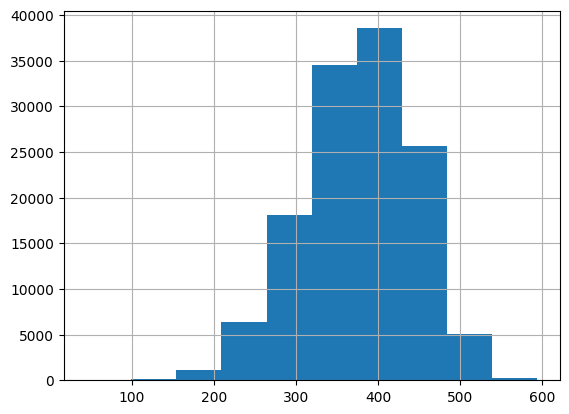

In [5]:
flight.coach_price.hist()

**Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 ticket seem more reasonable than before?**

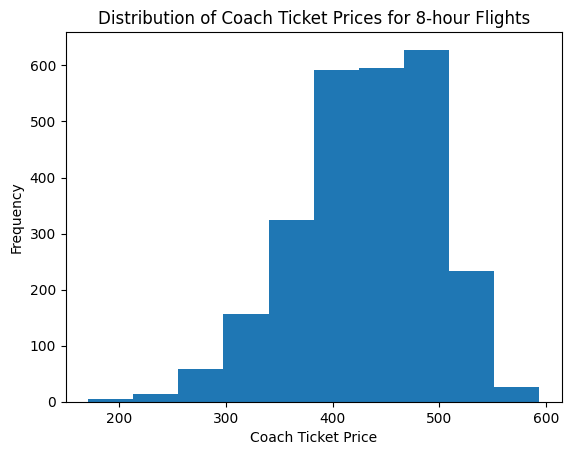

In [6]:
import matplotlib.pyplot as plt

# Filter the flights that are 8 hours long
eight_hour_flights = flight[flight["hours"] == 8]

# Plot the coach ticket prices for the filtered flights
plt.hist(eight_hour_flights["coach_price"])
plt.xlabel("Coach Ticket Price")
plt.ylabel("Frequency")
plt.title("Distribution of Coach Ticket Prices for 8-hour Flights")
plt.show()

In [7]:
eight_hour_flights["coach_price"].describe()

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

**How are flight delay times distributed? Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?**

In [8]:
flight.delay.describe()

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

In [9]:
flight_13_delay = flight[flight['delay'] >= 13]
print(flight_13_delay)

        miles  passengers  delay inflight_meal inflight_entertainment  \
10104    2628         208     13            No                    Yes   
10118    3864         220     13            No                    Yes   
10125    1709         216     13           Yes                    Yes   
10134    2167         200     17           Yes                     No   
10144    2320         209     14            No                    Yes   
...       ...         ...    ...           ...                    ...   
129775    674         217   1487            No                    Yes   
129776   2125         208   1479            No                    Yes   
129777   1702         220   1501            No                    Yes   
129778   2709         205   1484            No                    Yes   
129779   4005         214   1490            No                    Yes   

       inflight_wifi day_of_week redeye weekend  coach_price  \
10104            Yes      Friday     No     Yes      467.77

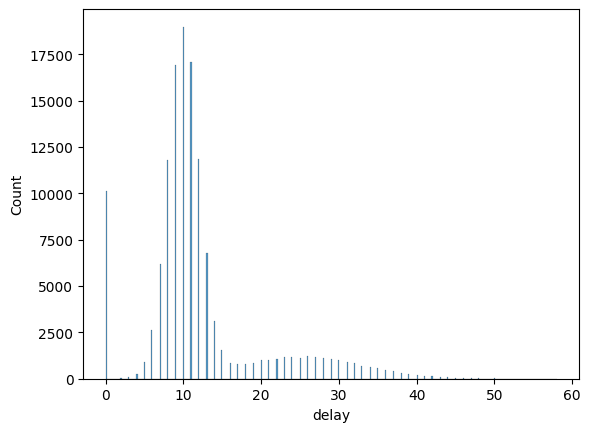

<Figure size 640x480 with 0 Axes>

In [10]:
sns.histplot(flight.delay[flight.delay <=500])
plt.show()
plt.clf()

**Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?**

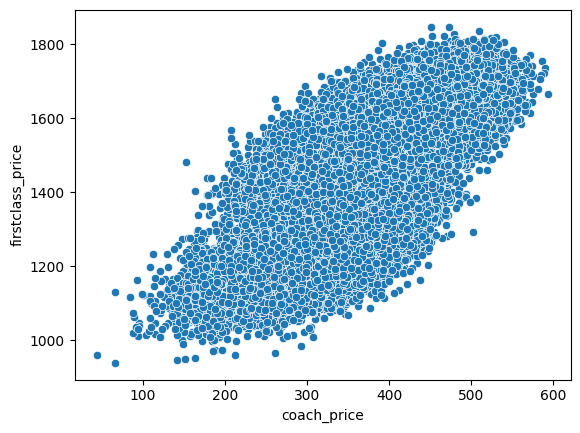

In [11]:
sns.scatterplot(x=flight.coach_price, y=flight.firstclass_price)
plt.show()

**What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?**

In [12]:
print(flight.columns)

Index(['miles', 'passengers', 'delay', 'inflight_meal',
       'inflight_entertainment', 'inflight_wifi', 'day_of_week', 'redeye',
       'weekend', 'coach_price', 'firstclass_price', 'hours'],
      dtype='object')


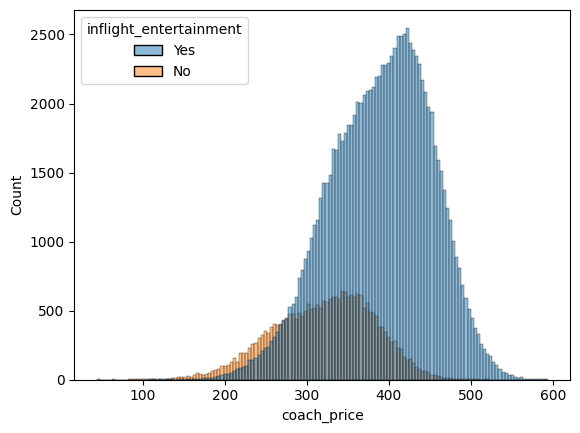

<Figure size 640x480 with 0 Axes>

In [13]:
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

In [14]:
coach_entertainment_yes = flight.coach_price[flight.inflight_entertainment == 'Yes']
coach_entertainment_no = flight.coach_price[flight.inflight_entertainment == 'No']

coach_entertainment_yes_mean = coach_entertainment_yes.mean()
coach_entertainment_no_mean = coach_entertainment_no.mean()

diff_entertainment = coach_entertainment_yes_mean - coach_entertainment_no_mean
print(diff_entertainment)

70.06515472358234


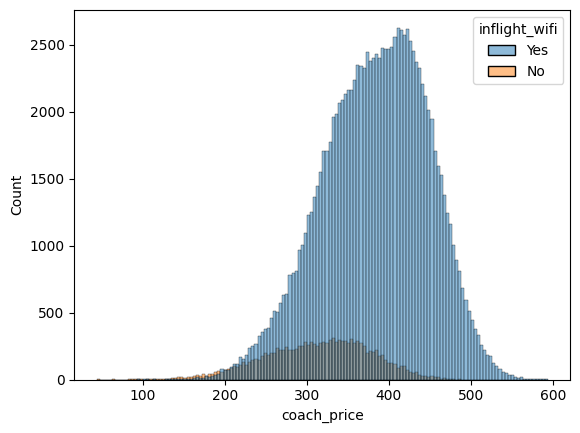

<Figure size 640x480 with 0 Axes>

In [15]:
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()

In [16]:
coach_wifi_yes = flight.coach_price[flight.inflight_wifi == 'Yes']
coach_wifi_no = flight.coach_price[flight.inflight_wifi == 'No']

coach_wifi_yes_mean = coach_wifi_yes.mean()
coach_wifi_no_mean = coach_wifi_no.mean()

diff_wifi = coach_wifi_yes_mean - coach_wifi_no_mean
print(diff_wifi)

70.46574876514734


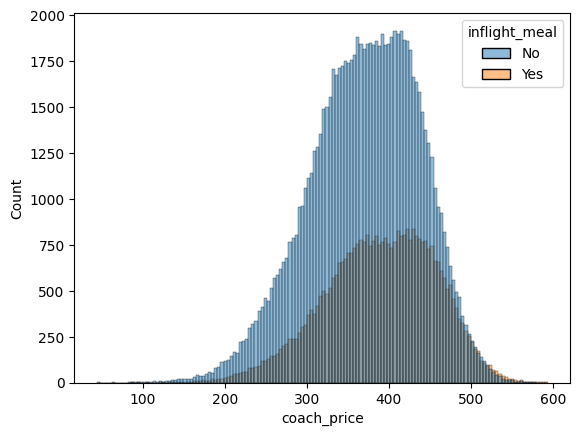

<Figure size 640x480 with 0 Axes>

In [17]:
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

In [18]:
coach_meal_yes = flight.coach_price[flight.inflight_meal == 'Yes']
coach_meal_no = flight.coach_price[flight.inflight_meal == 'No']

coach_meal_yes_mean = coach_meal_yes.mean()
coach_meal_no_mean = coach_meal_no.mean()

diff_meal = coach_meal_yes_mean - coach_meal_no_mean
print(diff_meal)

19.31352129718823


**How does the number of passengers change in relation to the length of flights?**

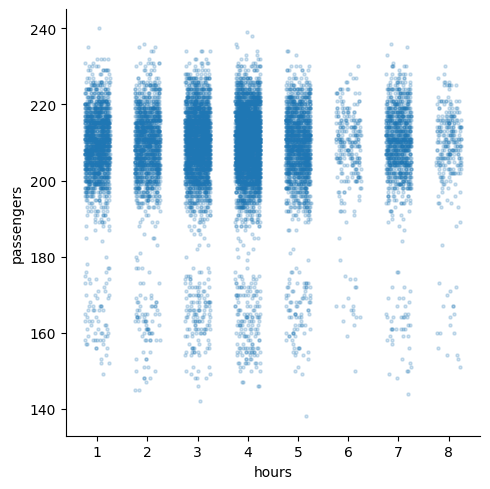

<Figure size 640x480 with 0 Axes>

In [19]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

**Visualize the relationship between coach and first-class prices on weekends compared to weekdays.**

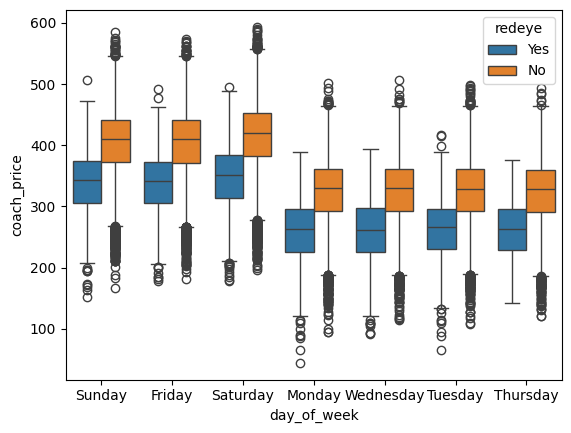

<Figure size 640x480 with 0 Axes>

In [20]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()

**How do coach prices differ for redeyes and non-redeyes on each day of the week?**

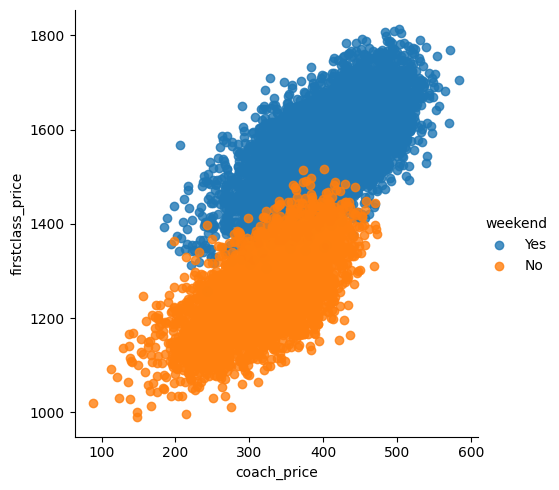

<Figure size 640x480 with 0 Axes>

In [21]:
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()